In [42]:
import sympy as smp
import numpy as np
import scipy

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [43]:
data = planilha_cartolina = pd.read_excel('./dados.xlsx')

x_data = data['t(s)'][0:24]
x_err = 1/25 *5/100 *x_data/0.2

y_data = data['y(0,1cm)'][0:24]*1e-2
y_data = y_data - y_data[0]
y_err = 0.1*1e-2

x_data_lin = x_data
y_data_lin = y_data/x_data

x_lin_err = x_err
y_lin_err = 1/x_data * y_err + y_data/(x_data**2)*x_err

y_data_lin[0] = 0
y_lin_err[0] = 0.000001


In [44]:
def func(x,a, b):
    return a*x + b

popt, pcov = curve_fit(func, x_data_lin, y_data_lin)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data_lin, func(x_data_lin, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  0.1013995093672853
b =  -0.005091651090343222
r^2 = 0.9998877320809435
a_err =  0.00022907444704471487
b_err =  0.000614955812646115


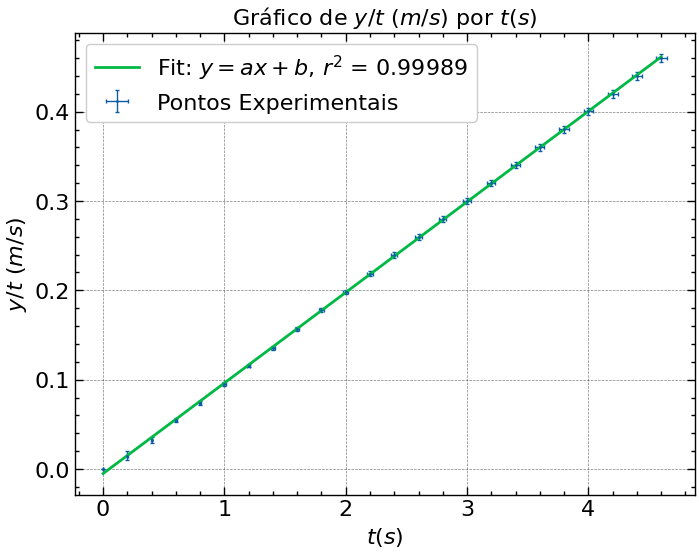

In [45]:
plt.errorbar(x_data_lin, y_data_lin, xerr = x_lin_err, yerr = y_lin_err, marker = 'o', ls = '', ms = 1,capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de $y/t \ (m/s)$ por $t(s)$')

plt.xlabel(r'$t(s)$')
plt.ylabel(r'$y/t \ (m/s)$')

func = lambda x: a*x + b
plt.plot(x_data_lin, func(x_data_lin) , label= r'Fit: $y = ax + b$, $r^2$ = %.5f' % (r2))
plt.legend()


In [46]:
h = 7.9*1e-2
delta_h = 0.1*1e-2

L = 381.2*1e-2
delta_L = 0.5*1e-2

sen = h/L
delta_sen = 1/L * delta_h + h/L**2 * delta_L

g = 2*a/sen
print(g)

delta_g = 2/sen * a_err + 2*a/(sen**2) * delta_sen

delta_g

9.785694422989659


0.15881206456875213